In [1]:
import sys
sys.path.append('../python/')
import ana
import ap
import aux
import cfg
import db
import fio

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
source("../R/anova.R")

# Initialization

## Deception Corpus

In [4]:
corpus_id_dc = cfg.CORPUS_ID_DC

In [5]:
db.connect(corpus_id_dc)
# get wide table with basic data
df_bt_dc = ap.load_data(cfg.NRM_SPK, ['gender', 'native_lang'])
db.close()

In [6]:
# compute local convergence, annotate, split by role
df_lcon_dc = ap.lcon(df_bt_dc)
df_lcon_dc = ana.annotate_local_measure(df_lcon_dc)
df_lcon_dc = ana.add_speaker_info(df_lcon_dc, df_bt_dc)
df_lcon_ee = df_lcon_dc[df_lcon_dc['speaker_role'] == 'f']
df_lcon_er = df_lcon_dc[df_lcon_dc['speaker_role'] == 'd']

In [7]:
# compute synchrony, annotate, split by role
df_syn_dc = ap.syn(df_bt_dc)
df_syn_dc = ana.annotate_local_measure(df_syn_dc)
df_syn_dc = ana.add_speaker_info(df_syn_dc, df_bt_dc)
df_syn_ee = df_syn_dc[df_syn_dc['speaker_role'] == 'f']
df_syn_er = df_syn_dc[df_syn_dc['speaker_role'] == 'd']

## Fisher Corpus

In [8]:
corpus_id_fc = cfg.CORPUS_ID_FC

In [9]:
db.connect(corpus_id_fc)
# get wide table with basic data
df_bt_fc = ap.load_data(cfg.NRM_SPK, ['gender', 'native_lang'])
db.close()

In [10]:
# compute local convergence, annotate, balance
df_lcon_fc = ap.lcon(df_bt_fc)
df_lcon_fc = ana.annotate_local_measure(df_lcon_fc)
df_lcon_fc = ana.add_speaker_info(df_lcon_fc, df_bt_fc)
df_lcon_fc = ana.filter_half_of_matches(corpus_id_fc, df_lcon_fc)

In [11]:
# compute synchrony, annotate, balance
df_syn_fc = ap.syn(df_bt_fc)
df_syn_fc = ana.annotate_local_measure(df_syn_fc)
df_syn_fc = ana.add_speaker_info(df_syn_fc, df_bt_fc)
df_syn_fc = ana.filter_half_of_matches(corpus_id_fc, df_syn_fc)

# Analysis

## Variation by role (Deception Corpus)

In [12]:
# compare each speaker with themselves as interviewee and interviewer
ana.compare_spk_in_both_roles(df_lcon_ee, df_lcon_er, 'conv.')
ana.compare_spk_in_both_roles(df_syn_ee, df_syn_er, 'sync.')

conv.
intensity_mean -0.234865 0.8144746088613292 299 -0.019324
intensity_max -0.694807 0.48771588173482816 299 -0.058031
pitch_mean -0.307756 0.7584824928264672 299 -0.02407
pitch_max -0.804309 0.421857492577527 299 -0.067204
jitter -1.0145 0.31116448016428333 299 -0.088
shimmer 0.049562 0.960504271711655 299 0.003993
nhr 0.342355 0.7323243932675143 299 0.027462
rate_syl 0.101009 0.9196107144368065 299 0.008512

sync.
intensity_mean 3.456328 0.0006269452293343133 299 0.280821
intensity_max 4.510423 9.305265193682357e-06 299 0.362587
pitch_mean 0.483427 0.6291466770607266 299 0.036276
pitch_max 0.715279 0.47499486359701826 299 0.057805
jitter 2.39484 0.017242983536740086 299 0.195145
shimmer 3.60297 0.00036833724116999586 299 0.293313
nhr 4.017459 7.448829035856641e-05 299 0.339317
rate_syl -6.360756 7.510044218847778e-10 299 -0.524415



In [13]:
# balance the dataset
df_lcon_ee = ana.filter_half_of_matches(corpus_id_dc, df_lcon_ee)
df_lcon_er = ana.filter_half_of_matches(corpus_id_dc, df_lcon_er)
df_syn_ee = ana.filter_half_of_matches(corpus_id_dc, df_syn_ee)
df_syn_er = ana.filter_half_of_matches(corpus_id_dc, df_syn_er)

## Variation across speakers

In [14]:
ana.get_stats(df_lcon_ee, 'Deception Corpus, EE (convergence)')

Deception Corpus, EE (convergence)
Entraining speakers: 47.9%
Valence
	positive: 40.9
	negative: 53.0
	mixed:    6.1
#Features
	1:   52.2
	2:   32.2
	3+:  15.6
	max: 5


In [15]:
ana.get_stats(df_syn_ee, 'Deception Corpus, EE (synchrony)')

Deception Corpus, EE (synchrony)
Entraining speakers: 60.4%
Valence
	positive: 69.0
	negative: 18.6
	mixed:    12.4
#Features
	1:   49.7
	2:   30.3
	3+:  20.0
	max: 6


In [16]:
ana.get_stats(df_lcon_er, 'Deception Corpus, ER (convergence)')

Deception Corpus, ER (convergence)
Entraining speakers: 41.7%
Valence
	positive: 39.0
	negative: 53.0
	mixed:    8.0
#Features
	1:   54.0
	2:   33.0
	3+:  13.0
	max: 5


In [17]:
ana.get_stats(df_syn_er, 'Deception Corpus, ER (synchrony)')

Deception Corpus, ER (synchrony)
Entraining speakers: 49.2%
Valence
	positive: 67.8
	negative: 25.4
	mixed:    6.8
#Features
	1:   61.0
	2:   27.1
	3+:  11.9
	max: 3


In [18]:
ana.get_stats(df_lcon_fc, 'Fisher Corpus (convergence)')

Fisher Corpus (convergence)
Entraining speakers: 39.4%
Valence
	positive: 38.0
	negative: 57.7
	mixed:    4.2
#Features
	1:   73.2
	2:   22.5
	3+:  4.2
	max: 5


In [19]:
ana.get_stats(df_syn_fc, 'Fisher Corpus (synchrony)')

Fisher Corpus (synchrony)
Entraining speakers: 48.3%
Valence
	positive: 66.7
	negative: 25.3
	mixed:    8.0
#Features
	1:   58.6
	2:   29.9
	3+:  11.4
	max: 5


## Discrete variation across speaker types

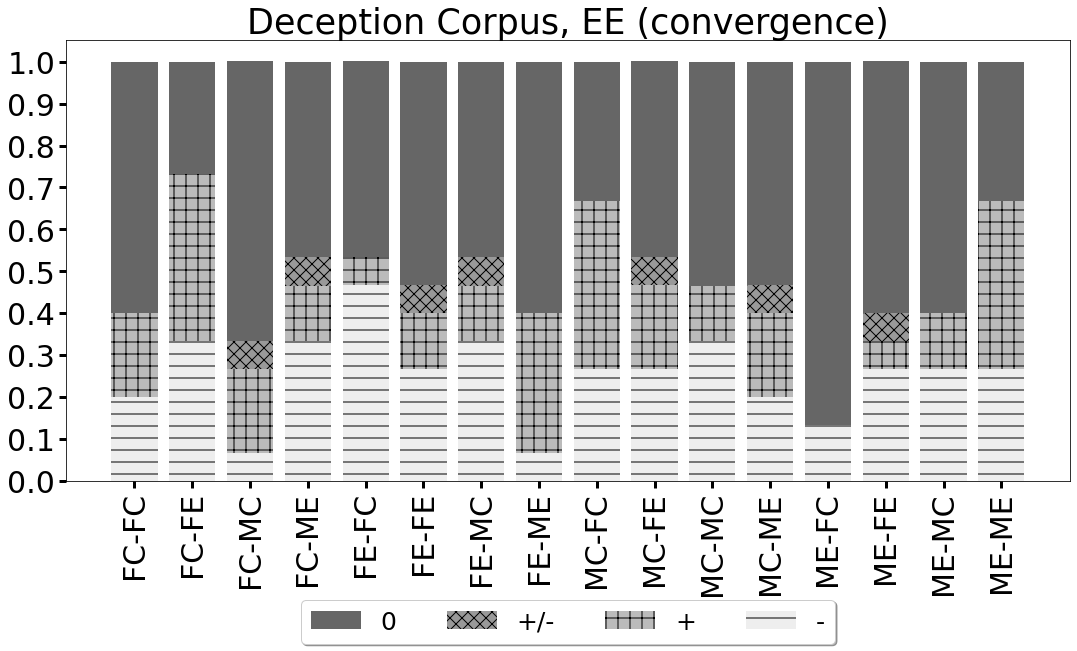

In [20]:
title = 'Deception Corpus, EE (convergence)'
ana.get_chart(corpus_id_dc, df_lcon_ee, title)

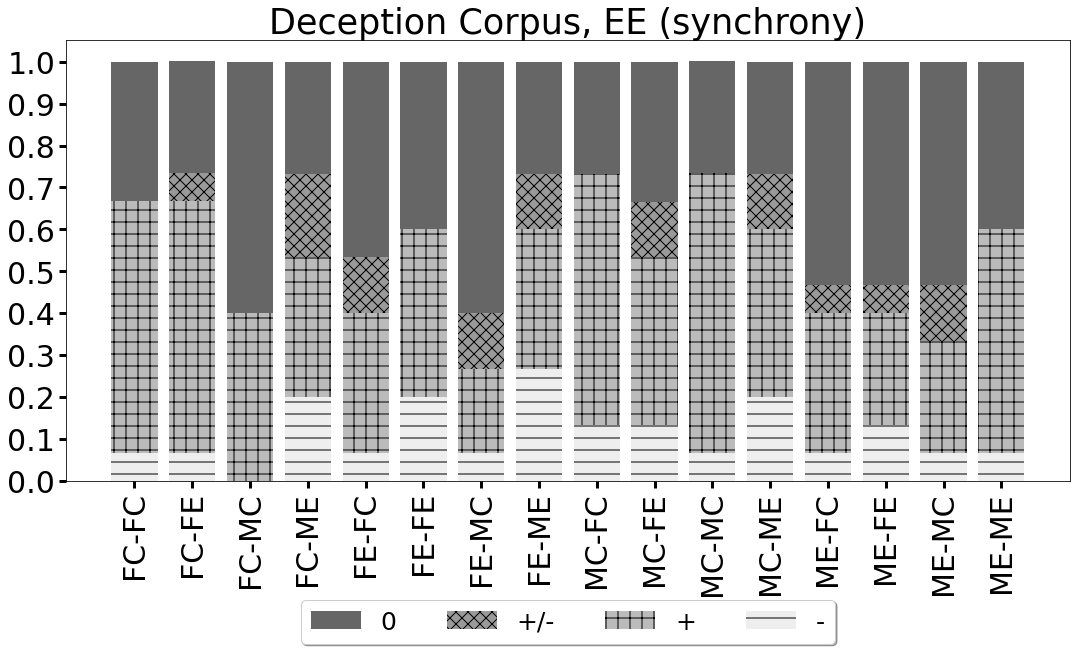

In [21]:
title = 'Deception Corpus, EE (synchrony)'
ana.get_chart(corpus_id_dc, df_syn_ee, title)

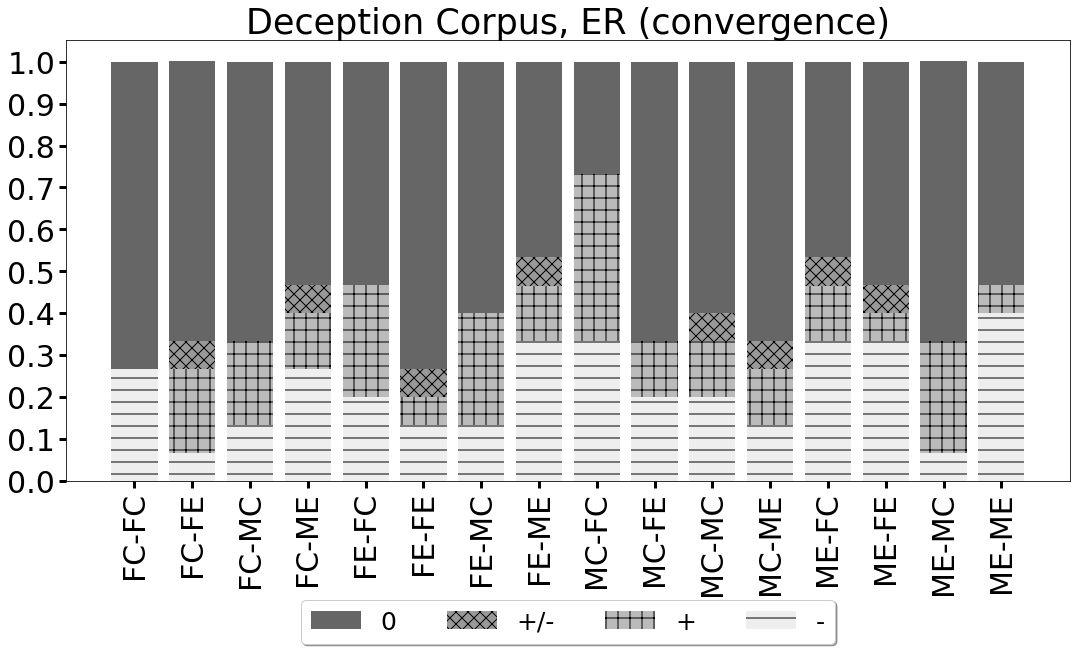

In [22]:
title = 'Deception Corpus, ER (convergence)'
ana.get_chart(corpus_id_dc, df_lcon_er, title)

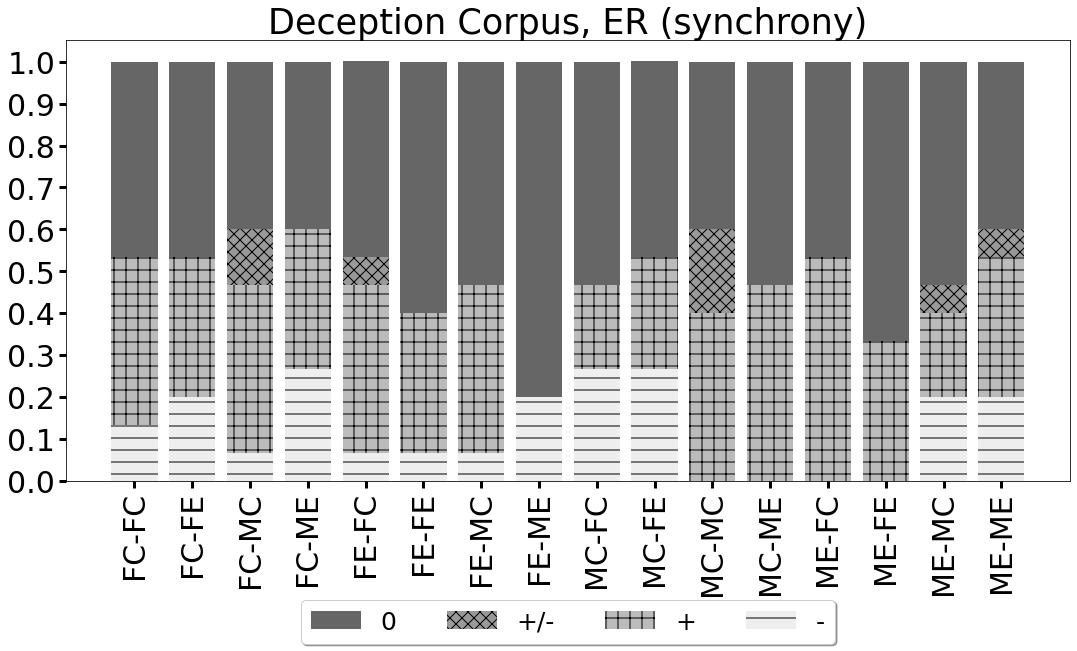

In [23]:
title = 'Deception Corpus, ER (synchrony)'
ana.get_chart(corpus_id_dc, df_syn_er, title)

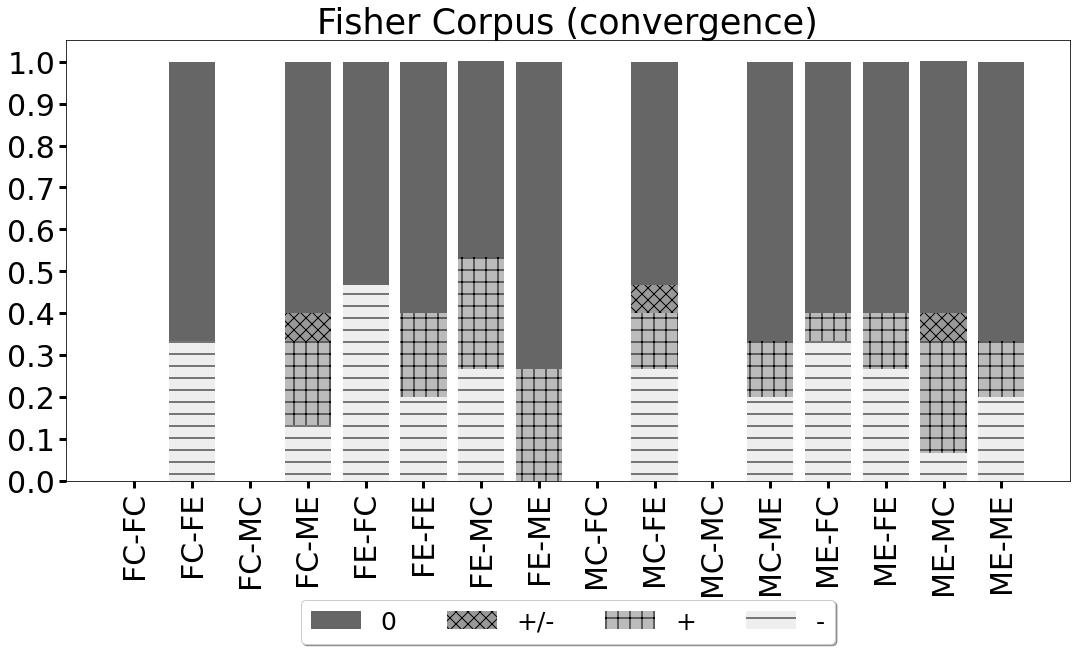

In [24]:
ana.get_chart(corpus_id_fc, df_lcon_fc, 'Fisher Corpus (convergence)')

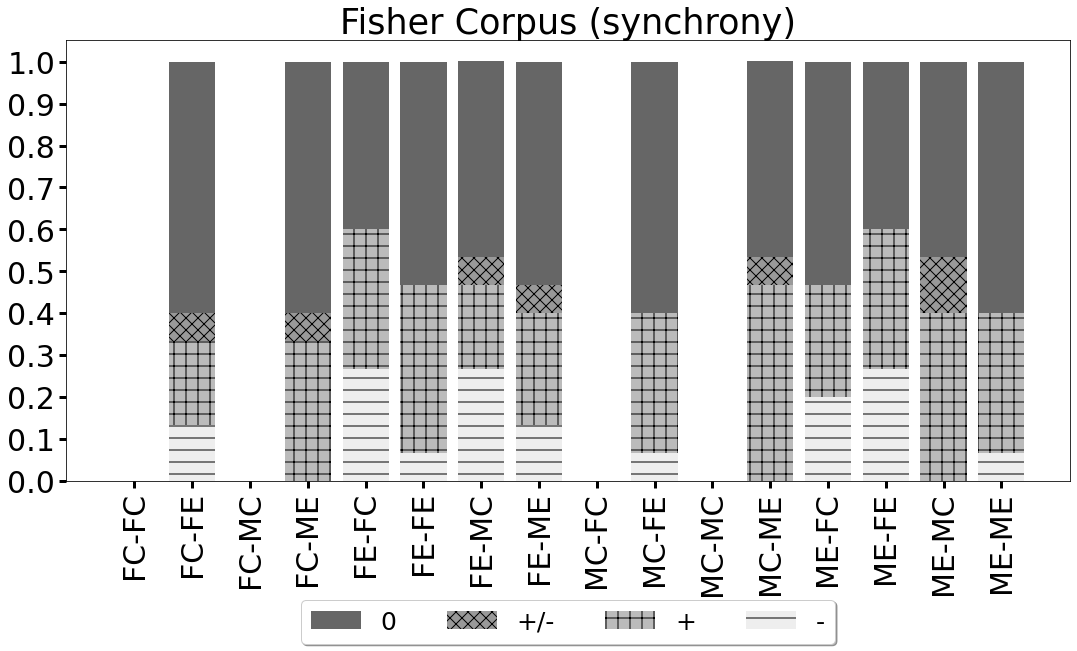

In [25]:
ana.get_chart(corpus_id_fc, df_syn_fc, 'Fisher Corpus (synchrony)')

## Continuous variation across speaker types

In [26]:
df = ana.prep_for_anova(df_lcon_ee)

In [27]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.024 0.00800   0.191  0.902
df$l          3  0.122 0.04076   0.973  0.406
df$g:df$l     9  0.302 0.03351   0.800  0.616
Residuals   224  9.379 0.04187               




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.012 0.00387   0.119  0.949
df$l          3  0.079 0.02618   0.807  0.491
df$g:df$l     9  0.398 0.04418   1.361  0.207
Residuals   224  7.270 0.03246               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)  
df$g          3  0.031 0.01038   0.604 0.6129  
df$l          3  0.134 0.04457   2.594 0.0534 .
df$g:df$l     9  0.053 0.00589   0.343 0.9598  
Residuals   224  3.849 0.01718                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




[1] "df$pitch_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean

In [28]:
df = ana.prep_for_anova(df_lcon_er)

In [29]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.138 0.04584   1.185  0.316
df$l          3  0.231 0.07703   1.992  0.116
df$g:df$l     9  0.173 0.01917   0.496  0.877
Residuals   224  8.663 0.03867               




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.294 0.09797   1.984  0.117
df$l          3  0.174 0.05805   1.176  0.320
df$g:df$l     9  0.388 0.04313   0.873  0.550
Residuals   224 11.061 0.04938               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.086 0.02865   1.418  0.238
df$l          3  0.070 0.02325   1.151  0.329
df$g:df$l     9  0.141 0.01567   0.776  0.639
Residuals   224  4.525 0.02020               




[1] "df$pitch_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3  0.011 0.003530   0.223  0.880
df$l      

In [30]:
df = ana.prep_for_anova(df_lcon_fc)

In [31]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.044 0.01467   0.335  0.800
df$l          2  0.064 0.03218   0.736  0.481
df$g:df$l     6  0.077 0.01289   0.295  0.939
Residuals   168  7.348 0.04374               




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.048 0.01589   0.408  0.747
df$l          2  0.077 0.03852   0.990  0.374
df$g:df$l     6  0.149 0.02485   0.639  0.699
Residuals   168  6.537 0.03891               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.150 0.04984   1.266  0.288
df$l          2  0.069 0.03470   0.881  0.416
df$g:df$l     6  0.274 0.04566   1.160  0.330
Residuals   168  6.614 0.03937               




[1] "df$pitch_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.018 0.00595   0.137  0.938
df$l        

In [32]:
df = ana.prep_for_anova(df_syn_ee)

In [33]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.079 0.02641   0.641  0.589
df$l          3  0.041 0.01353   0.329  0.805
df$g:df$l     9  0.238 0.02643   0.642  0.761
Residuals   224  9.227 0.04119               




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)
df$g          3  0.022 0.00722   0.223  0.880
df$l          3  0.000 0.00011   0.003  1.000
df$g:df$l     9  0.218 0.02423   0.750  0.663
Residuals   224  7.239 0.03232               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)  
df$g          3  0.041 0.01367   0.615  0.606  
df$l          3  0.212 0.07059   3.174  0.025 *
df$g:df$l     9  0.119 0.01322   0.594  0.801  
Residuals   224  4.982 0.02224                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level



In [34]:
df = ana.prep_for_anova(df_syn_er)

In [35]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3  0.029 0.009546   0.318  0.813
df$l          3  0.060 0.019975   0.664  0.575
df$g:df$l     9  0.250 0.027749   0.923  0.506
Residuals   224  6.734 0.030062               




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3  0.011 0.003789   0.142  0.935
df$l          3  0.054 0.017873   0.670  0.571
df$g:df$l     9  0.223 0.024797   0.930  0.500
Residuals   224  5.974 0.026669               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)  
df$g          3  0.014 0.00458   0.218 0.8839  
df$l          3  0.166 0.05542   2.636 0.0506 .
df$g:df$l     9  0.139 0.01542   0.733 0.6781  
Residuals   224  4.710 0.02103                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




[1] "df$pitch_max  ~ df$g + df$l + df$g:df$l"
             Df S

FM:EC-FF:EC -0.0442116877 -0.22876569  0.140342311 0.9999792
MF:EC-FF:EC -0.1272421537 -0.31179615  0.057311845 0.5576126
MM:EC-FF:EC -0.0401272841 -0.22468128  0.144426715 0.9999942
FF:EE-FF:EC -0.0269841304 -0.21153813  0.157569869 1.0000000
FM:EE-FF:EC -0.1922960786 -0.37685008 -0.007742079 0.0316957
MF:EE-FF:EC -0.0945639267 -0.27911793  0.089990072 0.9224083
MM:EE-FF:EC  0.0186014772 -0.16595252  0.203155476 1.0000000
MF:EC-FM:EC -0.0830304660 -0.26758447  0.101523533 0.9737127
MM:EC-FM:EC  0.0040844036 -0.18046960  0.188638403 1.0000000
FF:EE-FM:EC  0.0172275573 -0.16732644  0.201781556 1.0000000
FM:EE-FM:EC -0.1480843908 -0.33263839  0.036469608 0.2880159
MF:EE-FM:EC -0.0503522390 -0.23490624  0.134201760 0.9998906
MM:EE-FM:EC  0.0628131649 -0.12174083  0.247367164 0.9984729
MM:EC-MF:EC  0.0871148696 -0.09743913  0.271668869 0.9599884
FF:EE-MF:EC  0.1002580233 -0.08429598  0.284812022 0.8811280
FM:EE-MF:EC -0.0650539249 -0.24960792  0.119500074 0.9977429
MF:EE-MF:EC  0.032678227

In [36]:
df = ana.prep_for_anova(df_syn_fc)

In [37]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)  
df$g          3  0.588 0.19603   3.773 0.0118 *
df$l          2  0.064 0.03185   0.613 0.5429  
df$g:df$l     6  0.253 0.04209   0.810 0.5634  
Residuals   168  8.729 0.05196                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula(frm))

$`df$g`
             diff          lwr        upr     p adj
FM-FF -0.01772211 -0.142423265 0.10697905 0.9828155
MF-FF -0.03203327 -0.156734428 0.09266788 0.9095155
MM-FF  0.11279085 -0.011910308 0.23749200 0.0916656
MF-FM -0.01431116 -0.139012319 0.11038999 0.9907874
MM-FM  0.13051296  0.005811801 0.25521411 0.0363696
MM-MF  0.14482412  0.020122964 0.26952528 0.0156365





[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)  
df$g          3  0.367 0.12226   2.275 0.0818 .
df$l    

In [38]:
df = ana.prep_for_anova(df_syn_ee, lambda x: abs(aux.r2z(x)))

In [39]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3  0.052 0.017224   0.812  0.488
df$l          3  0.022 0.007324   0.345  0.793
df$g:df$l     9  0.076 0.008404   0.396  0.936
Residuals   224  4.752 0.021215               




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3  0.048 0.015862   0.955  0.415
df$l          3  0.044 0.014526   0.875  0.455
df$g:df$l     9  0.062 0.006864   0.413  0.927
Residuals   224  3.721 0.016609               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)  
df$g          3 0.0033 0.001096   0.123 0.9468  
df$l          3 0.0834 0.027813   3.108 0.0273 *
df$g:df$l     9 0.0491 0.005454   0.609 0.7884  
Residuals   224 2.0046 0.008949                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise con

In [40]:
df = ana.prep_for_anova(df_syn_er, lambda x: abs(aux.r2z(x)))

In [41]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3 0.0093 0.003086   0.222  0.881
df$l          3 0.0465 0.015508   1.118  0.343
df$g:df$l     9 0.0954 0.010602   0.764  0.650
Residuals   224 3.1076 0.013873               




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3 0.0065 0.002173   0.197  0.898
df$l          3 0.0253 0.008448   0.766  0.514
df$g:df$l     9 0.0511 0.005675   0.515  0.863
Residuals   224 2.4693 0.011024               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3 0.0107 0.003555   0.333  0.802
df$l          3 0.0279 0.009316   0.871  0.457
df$g:df$l     9 0.1182 0.013134   1.229  0.278
Residuals   224 2.3946 0.010690               




[1] "df$pitch_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3 0.0350 0.011667   1.448  0

In [42]:
df = ana.prep_for_anova(df_syn_fc, lambda x: abs(aux.r2z(x)))

In [43]:
%%R -i df
run_anovas(df)

[1] "df$intensity_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)  
df$g          3  0.196 0.06519   2.370 0.0724 .
df$l          2  0.017 0.00855   0.311 0.7334  
df$g:df$l     6  0.069 0.01149   0.418 0.8664  
Residuals   168  4.621 0.02750                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




[1] "df$intensity_max  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq  Mean Sq F value Pr(>F)
df$g          3  0.030 0.010103   0.419  0.739
df$l          2  0.016 0.008226   0.341  0.711
df$g:df$l     6  0.141 0.023446   0.973  0.445
Residuals   168  4.048 0.024096               




[1] "df$pitch_mean  ~ df$g + df$l + df$g:df$l"
             Df Sum Sq Mean Sq F value Pr(>F)  
df$g          3  0.069 0.02285   0.688 0.5604  
df$l          2  0.230 0.11493   3.462 0.0336 *
df$g:df$l     6  0.027 0.00451   0.136 0.9915  
Residuals   168  5.577 0.03319                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

## Auxiliary tests

In [44]:
# check for correlations with number of years of english experience
ana.correlate_eng_yrs(df_lcon_ee, 'EE (conv.)')
ana.correlate_eng_yrs(df_lcon_er, 'ER (conv.)')
ana.correlate_eng_yrs(df_syn_ee, 'EE (sync.)')
ana.correlate_eng_yrs(df_syn_er, 'ER (sync.)')
func = lambda x: abs(aux.r2z(x))
ana.correlate_eng_yrs(df_lcon_ee, 'EE (conv., abs)', func)
ana.correlate_eng_yrs(df_lcon_er, 'ER (conv., abs)', func)
ana.correlate_eng_yrs(df_syn_ee, 'EE (sync., abs)', func)
ana.correlate_eng_yrs(df_syn_er, 'ER (sync., abs)', func)

EE (conv.)
intensity_mean (-0.006453213398898019, 0.9447075810002118, 116)
intensity_max (0.07631621693701518, 0.41142976063746933, 116)
pitch_mean (-0.11180962955524978, 0.22804198297152065, 116)
pitch_max (-0.06805535321961671, 0.46401584966864967, 116)
jitter (0.0254327183176946, 0.7845662699710527, 116)
shimmer (-0.21104686419464486, 0.021787384812505355, 116)
nhr (-0.12828928236512344, 0.16621414984936467, 116)
rate_syl (0.06995197136880654, 0.45162623010368413, 116)

ER (conv.)
intensity_mean (-0.04187336657977058, 0.6525542310047624, 116)
intensity_max (0.005168659671472361, 0.9557013361986778, 116)
pitch_mean (0.11938373851625853, 0.1978696786372702, 116)
pitch_max (0.24332212789475383, 0.007929761006130742, 116)
jitter (-0.03908593789160368, 0.6743226673185828, 116)
shimmer (0.09762650955421578, 0.2929276458740035, 116)
nhr (0.010771817851514813, 0.9078351224670067, 116)
rate_syl (-0.014644433461791413, 0.8749341325639122, 116)

EE (sync.)
intensity_mean (0.044018909544973846,

In [45]:
# within each corpus, compare number of speakers with significant
# local convergence and synchrony, resp.
ana.compare_sig_cnt_within_corpus(df_lcon_ee, df_syn_ee, 'EE')
ana.compare_sig_cnt_within_corpus(df_lcon_er, df_syn_er, 'ER')
ana.compare_sig_cnt_within_corpus(df_lcon_fc, df_syn_fc, 'FC')

EE 7.057342657342657 0.007894100823381513 1
ER 2.428741508508999 0.11912850383216617 1
FC 2.5379120190500064 0.11114167287012994 1


In [46]:
# across all three (sub-)corpora, compare number of speakers with 
# significant results
ana.compare_sig_cnt_across_corpora(
    df_lcon_ee, df_lcon_er, df_lcon_fc, 'conv.')
ana.compare_sig_cnt_across_corpora(
    df_syn_ee, df_syn_er, df_syn_fc, 'sync.')

conv. 3.433257918552036 0.17967080577893044 2
sync. 8.289539170506915 0.015847086933204073 2


In [47]:
# across the subcorpora of the deception corpus, compare number of 
# speakers with significant results
ana.compare_sig_cnt_across_dc(df_lcon_ee, df_lcon_er, 'conv.')
ana.compare_sig_cnt_across_dc(df_syn_ee, df_syn_er, 'sync.')

conv. 1.6512505484861781 0.19878881019907127 1
sync. 5.685549578595083 0.01710518127557662 1


In [48]:
# across all three (sub-)corpora, compare number of speakers for all 
# (non-0) valences (pos, neg, mixed)
ana.compare_valence_across_corpora(
    df_lcon_ee, df_lcon_er, df_lcon_fc, 'conv.')
ana.compare_valence_across_corpora(
    df_syn_ee, df_syn_er, df_syn_fc, 'sync.')

conv. 1.2725886080479505 0.8660088166460598 4
sync. 4.180686999576468 0.3821044608342798 4


In [49]:
# across all three (sub-)corpora, compare number of speakers with 
# 1, 2, 3+ significant features per measure
ana.compare_sig_fea_cnt_across_corpora(
    df_lcon_ee, df_lcon_er, df_lcon_fc, 'conv.')
ana.compare_sig_fea_cnt_across_corpora(
    df_syn_ee, df_syn_er, df_syn_fc, 'sync.')

conv. 10.565673783031077 0.03190427458244104 4
sync. 5.798555941759384 0.21470579773868512 4


In [50]:
# across the subcorpora of the deception corpus, compare number of 
# speakers with 1, 2, 3+ significant features per measure
ana.compare_sig_fea_cnt_across_dc(df_lcon_ee, df_lcon_er, 'conv.')
ana.compare_sig_fea_cnt_across_dc(df_syn_ee, df_syn_er, 'sync.')

conv. 0.30578931550475075 0.8582201238865382 2
sync. 4.4018244679290985 0.11070212604745734 2


In [51]:
# per speaker type, compare number of speakers with purely positive to
# those with purely negative entrainment
ana.compare_valence_per_spk_type(df_lcon_ee, 'EE (conv.)')
ana.compare_valence_per_spk_type(df_lcon_er, 'ER (conv.)')
ana.compare_valence_per_spk_type(df_lcon_fc, 'FC (conv.)')
ana.compare_valence_per_spk_type(df_syn_ee, 'EE (sync.)')
ana.compare_valence_per_spk_type(df_syn_er, 'ER (sync.)')
ana.compare_valence_per_spk_type(df_syn_fc, 'FC (sync.)')

EE (conv.) (-1.343836599403665, 0.1989767614886568, 15)
ER (conv.) (-1.4308577009771735, 0.1729737932729638, 15)
FC (conv.) (-1.2799601057612797, 0.2268940844548294, 11)
EE (sync.) (7.142232628364684, 3.3800999459254006e-06, 15)
ER (sync.) (4.037864265436241, 0.0010734331202136571, 15)
FC (sync.) (4.1797832761154154, 0.0015371149789801164, 11)


In [52]:
# per speaker type, compare number of speakers with significant local
# convergence and synchrony, resp.
ana.compare_sig_cnt_per_spk_type(df_lcon_ee, df_syn_ee, 'EE')
ana.compare_sig_cnt_per_spk_type(df_lcon_er, df_syn_er, 'ER')
ana.compare_sig_cnt_per_spk_type(df_lcon_fc, df_syn_fc, 'FC')

EE (-3.5290047518734498, 0.003037282847677773, 15)
ER (-1.6947980485980962, 0.11076722042338742, 15)
FC (-3.5456210417116734, 0.004587202646462882, 11)


In [53]:
# per gender type (speaker & partner gender), compare number of speakers
# for all valences (pos, neg, mixed, none)
col = 'gender'
levels = ['f', 'm']
_, _ = ana.compare_prtl_spk_types(df_lcon_ee, col, levels, 'EE (conv.)')
_, _ = ana.compare_prtl_spk_types(df_lcon_er, col, levels, 'ER (conv.)')
_, _ = ana.compare_prtl_spk_types(df_lcon_fc, col, levels, 'FC (conv.)')
_, _ = ana.compare_prtl_spk_types(df_syn_ee, col, levels, 'EE (sync.)')
_, _ = ana.compare_prtl_spk_types(df_syn_er, col, levels, 'ER (sync.)')
_, _ = ana.compare_prtl_spk_types(df_syn_fc, col, levels, 'FC (sync.)')

EE (conv.) 4.457782251233246 0.8787878829605138 9
ER (conv.) 5.20066348745594 0.8164767598393773 9
FC (conv.) 12.35046368812312 0.19426504868047315 9
EE (sync.) 5.424249512670565 0.7958692912131944 9
ER (sync.) 8.727322404371584 0.4628159940389547 9
FC (sync.) 10.472473021972466 0.31360577507245013 9


In [54]:
# per native language type (speaker & partner native lang.), compare 
# number of speakers for all valences (pos, neg, mixed, none)
col = 'native_lang'
levels = ['Chinese', 'English']
_, _ = ana.compare_prtl_spk_types(df_lcon_ee, col, levels, 'EE (conv.)')
_, _ = ana.compare_prtl_spk_types(df_lcon_er, col, levels, 'ER (conv.)')
_, _ = ana.compare_prtl_spk_types(df_lcon_fc, col, levels, 'FC (conv.)',
                                  False)
o, e = ana.compare_prtl_spk_types(df_syn_ee, col, levels, 'EE (sync.)')
_, _ = ana.compare_prtl_spk_types(df_syn_er, col, levels, 'ER (sync.)')
_, _ = ana.compare_prtl_spk_types(df_syn_fc, col, levels, 'FC (sync.)', 
                                  False)

EE (conv.) 9.726297075090937 0.37309408968350705 9
ER (conv.) 9.65200082935932 0.37938500134196984 9
FC (conv.) 5.207528405559285 0.5174850037757803 6
EE (sync.) 24.582456140350878 0.003469499397254369 9
ER (sync.) 13.333333333333334 0.14809419563191106 9
FC (sync.) 6.315978793175679 0.3887403726412759 6


In [55]:
o

array([[34,  4,  0, 22],
       [26,  9,  8, 17],
       [17,  4,  7, 32],
       [23, 10,  3, 24]])

In [56]:
e

array([[25.  ,  6.75,  4.5 , 23.75],
       [25.  ,  6.75,  4.5 , 23.75],
       [25.  ,  6.75,  4.5 , 23.75],
       [25.  ,  6.75,  4.5 , 23.75]])

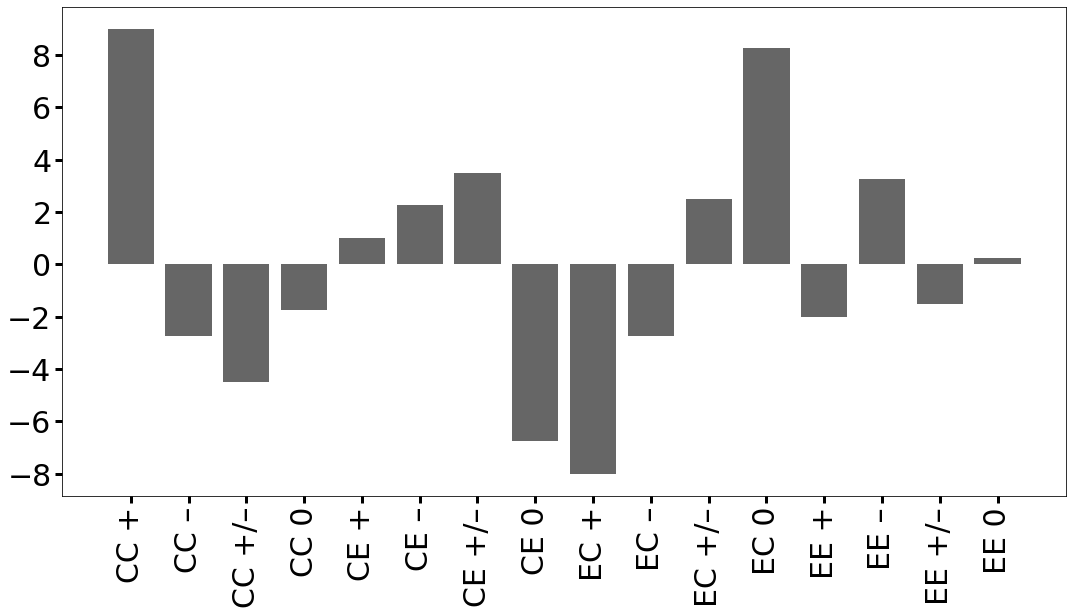

In [57]:
# maybe illustrate?
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18, 9)
plt.tick_params(axis='both', which='major', 
                labelsize=30, width=3, length=7)

data = list(itertools.chain(*(o-e)))
p_m = ax.bar(range(len(data)), data, color='#666666')

labels = list(itertools.product(levels, levels, ['+', '–', '+/–', '0']))
labels = [(l[0][0] + l[1][0] + ' ' + l[2]) for l in labels]
plt.xticks(range(len(data)), labels, rotation=90)
plt.yticks(range(-8, 9, 2))
plt.show()    

In [58]:
df_bt_dc.groupby('spk_id')['age'].first().mean()

23.193979933110366

In [59]:
df_bt_dc.groupby('spk_id')['age'].first().std()

4.625124400242308

In [60]:
df_bt_fc.groupby('spk_id')['age'].first().mean()

33.48571428571429

In [61]:
df_bt_fc.groupby('spk_id')['age'].first().std()

11.156661095862368

In [62]:
db.connect(corpus_id_dc)
# get wide table with basic data
df_bt_dc_all = ap.load_data(cfg.NRM_RAW)
df_bt_dc_rel = ana.get_ti_tf_ipus(df_bt_dc_all)
df_bt_ee_all = df_bt_dc_all[df_bt_dc_all['speaker_role'] == 'f']
df_bt_ee_rel = df_bt_dc_rel[df_bt_dc_rel['speaker_role'] == 'f']
df_bt_er_all = df_bt_dc_all[df_bt_dc_all['speaker_role'] == 'd']
df_bt_er_rel = df_bt_dc_rel[df_bt_dc_rel['speaker_role'] == 'd']
db.close()

no normalization requested, only renaming "_raw" columns


In [63]:
db.connect(corpus_id_fc)
# get wide table with basic data
df_bt_fc_all = ap.load_data(cfg.NRM_RAW)
df_bt_fc_rel = ana.get_ti_tf_ipus(df_bt_fc_all)
db.close()

no normalization requested, only renaming "_raw" columns


In [64]:
ana.get_ipu_stats(df_bt_dc_rel, df_bt_dc_all, True)

total number of relevant IPUs: 84038
syllables per relevant IPU: 5.13 (4.71)
duration per relevant IPU (in s): 1.22 (0.91)
total duration of relevant IPUs (in h): 28.42
number of total IPUs per turn: 2.45 (2.82)
number of relevant IPUs per speaker:
	min:  70.00
	max:  677.00
	mean: 280.13
	std:  133.25


speech rate of relevant IPUs per speaker: 4.09 (0.59)
duration of relevant IPUs per speaker: 1.23 (0.20)
syllables per relevant IPU per speaker: 5.29 (1.15)


number of relevant IPUs per speaker (gender == f): 266.16 (129.82)
number of relevant IPUs per speaker (gender == m): 294.09 (135.58)
(-1.8225131617161259, 0.06937920460175102, 298)
speech rate of relevant IPUs per speaker (gender == f): 3.94 (0.54)
speech rate of relevant IPUs per speaker (gender == m): 4.24 (0.60)
(-4.517032574747607, 9.04823747204577e-06, 298)
duration of relevant IPUs per speaker (gender == f): 1.27 (0.21)
duration of relevant IPUs per speaker (gender == m): 1.20 (0.19)
(2.7678343786708712, 0.0059962248445800

In [65]:
ana.get_ipu_stats(df_bt_ee_rel, df_bt_ee_all)

total number of relevant IPUs: 41352
syllables per relevant IPU: 5.13 (5.05)
duration per relevant IPU (in s): 1.26 (0.97)
total duration of relevant IPUs (in h): 14.50
number of total IPUs per turn: 2.83 (3.58)
number of relevant IPUs per speaker:
	min:  25.00
	max:  411.00
	mean: 137.84
	std:  74.22


speech rate of relevant IPUs per speaker: 3.80 (0.61)
duration of relevant IPUs per speaker: 1.27 (0.28)
syllables per relevant IPU per speaker: 5.14 (1.63)


number of relevant IPUs per speaker (gender == f): 129.07 (70.55)
number of relevant IPUs per speaker (gender == m): 146.61 (76.94)
(-2.0569975620611487, 0.04055660665131546, 298)
speech rate of relevant IPUs per speaker (gender == f): 3.65 (0.57)
speech rate of relevant IPUs per speaker (gender == m): 3.94 (0.62)
(-4.269824697064849, 2.632988143131757e-05, 298)
duration of relevant IPUs per speaker (gender == f): 1.30 (0.30)
duration of relevant IPUs per speaker (gender == m): 1.24 (0.27)
(1.9016230402196765, 0.05818474255647092,

In [66]:
ana.get_ipu_stats(df_bt_er_rel, df_bt_er_all)

total number of relevant IPUs: 42686
syllables per relevant IPU: 5.13 (4.35)
duration per relevant IPU (in s): 1.17 (0.84)
total duration of relevant IPUs (in h): 13.92
number of total IPUs per turn: 2.08 (1.66)
number of relevant IPUs per speaker:
	min:  27.00
	max:  403.00
	mean: 142.29
	std:  74.58


speech rate of relevant IPUs per speaker: 4.36 (0.72)
duration of relevant IPUs per speaker: 1.21 (0.23)
syllables per relevant IPU per speaker: 5.43 (1.20)


number of relevant IPUs per speaker (gender == f): 137.09 (74.31)
number of relevant IPUs per speaker (gender == m): 147.49 (74.72)
(-1.20863080441255, 0.22776286555777037, 298)
speech rate of relevant IPUs per speaker (gender == f): 4.21 (0.68)
speech rate of relevant IPUs per speaker (gender == m): 4.50 (0.73)
(-3.5817795477472436, 0.00039839898003009224, 298)
duration of relevant IPUs per speaker (gender == f): 1.25 (0.23)
duration of relevant IPUs per speaker (gender == m): 1.17 (0.22)
(3.042754407837605, 0.0025530238050956258

In [67]:
ana.get_ipu_stats(df_bt_fc_rel, df_bt_fc_all)

total number of relevant IPUs: 12086
syllables per relevant IPU: 10.91 (12.43)
duration per relevant IPU (in s): 1.92 (3.37)
total duration of relevant IPUs (in h): 6.44
number of total IPUs per turn: 1.59 (1.24)
number of relevant IPUs per speaker:
	min:  17.00
	max:  100.00
	mean: 57.55
	std:  16.19


speech rate of relevant IPUs per speaker: 5.35 (1.04)
duration of relevant IPUs per speaker: 2.00 (0.81)
syllables per relevant IPU per speaker: 11.50 (5.25)


number of relevant IPUs per speaker (gender == f): 56.62 (16.32)
number of relevant IPUs per speaker (gender == m): 58.49 (16.08)
(-0.8348981829814806, 0.4047329527419964, 208)
speech rate of relevant IPUs per speaker (gender == f): 5.12 (0.96)
speech rate of relevant IPUs per speaker (gender == m): 5.57 (1.07)
(-3.222700482205471, 0.0014741943613884926, 208)
duration of relevant IPUs per speaker (gender == f): 2.09 (0.85)
duration of relevant IPUs per speaker (gender == m): 1.91 (0.76)
(1.6456167331278104, 0.10135293261042101, 2